# WSI - zadanie 5

Artur Kempiński
325168

Użyta technologia:

python==3.11.6

matplotlib==3.8.0

numpy==1.24.3

gymnasium==0.29.1

In [137]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# Implementacja

In [138]:
def init_qtable(env: gym.Env) -> np.ndarray:
    return np.zeros((env.observation_space.n, env.action_space.n))

In [139]:
def get_starting_state(env: gym.Env) -> int:
    return env.reset()[0]

In [140]:
def generate_next_action(env: gym.Env, qtable: np.ndarray, state: int, epsilon: float) -> int:
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(qtable[state])

Strategia ε-zachłanna

In [141]:
def do_action(env: gym.Env, action: int) -> (int, float, bool):
    next_state, reward, done, _, _ = env.step(action)
    return next_state, reward, done

In [142]:
def get_updated_qtable(qtable: np.ndarray, current_state: int, next_state: int, action: int, reward: float, gamma: float, beta: float) -> np.ndarray:
    qtable[current_state, action] += beta * (reward + gamma * np.max(qtable[next_state]) - qtable[current_state, action])
    return qtable

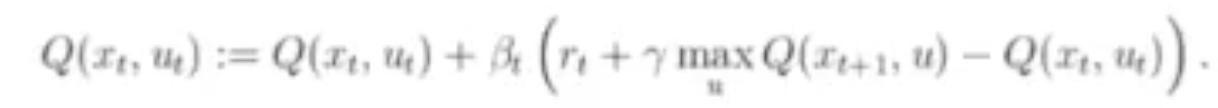

In [143]:
def q_learn(env: gym.Env, episodes_count: int, epsilon: float, gamma: float, beta: float, t_max: int = 1000) -> (np.ndarray, list):
    qtable = init_qtable(env)
    rewards = []
    for _ in range(episodes_count):
        current_state = get_starting_state(env)
        episode_rewards = 0
        for _ in range(t_max):
            action = generate_next_action(env, qtable, current_state, epsilon)
            next_state, reward, done = do_action(env, action)
            qtable = get_updated_qtable(
                qtable=qtable,
                current_state=current_state,
                next_state=next_state,
                action=action,
                reward=reward,
                gamma=gamma,
                beta=beta
            )
            current_state = next_state
            episode_rewards += reward
            if done:
                break
        rewards.append(episode_rewards)
    return qtable, rewards

# Badania

In [144]:
env = gym.make('CliffWalking-v0')

In [145]:
def draw_plot(x, y, x_label, y_label, title):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

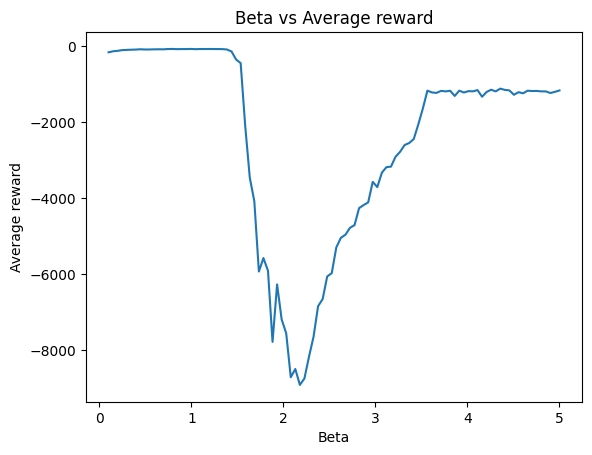

In [146]:
betas = np.linspace(0.1, 5, 100)
average_rewards = []

for beta in betas:
    average_rewards_for_beta = []
    for _ in range(5):
        _, rewards = q_learn(env=env, episodes_count=100, epsilon=0.1, gamma=0.9, beta=beta)
        average_rewards_for_beta.append(np.average(rewards))
    average_rewards.append(np.average(average_rewards_for_beta))
    
draw_plot(betas, average_rewards, 'Beta', 'Average reward', 'Beta vs Average reward')

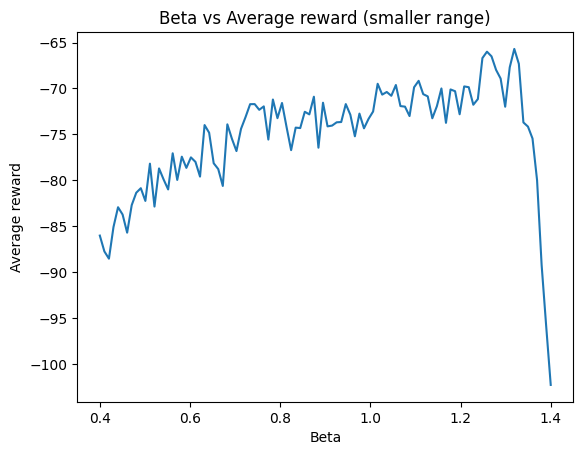

In [151]:
betas = np.linspace(0.4, 1.4, 100)
average_rewards = []

for beta in betas:
    average_rewards_for_beta = []
    for _ in range(15):
        _, rewards = q_learn(env=env, episodes_count=100, epsilon=0.1, gamma=0.9, beta=beta)
        average_rewards_for_beta.append(np.average(rewards))
    average_rewards.append(np.average(average_rewards_for_beta))
    
draw_plot(betas, average_rewards, 'Beta', 'Average reward', 'Beta vs Average reward (smaller range)')

Dla przyjętych:
* epsilon=0.1
* gamma=0.9

najlepsze rezultaty osiągane są dla beta z zakresu ~(1.1, 1.3)

Co ciekawe, średnie nagrody uzyskiwane przez algorytm gwałtownie spadają dla beta~2.2, a następnie rosną do beta~3.5 gdzie sie stabilizują. 

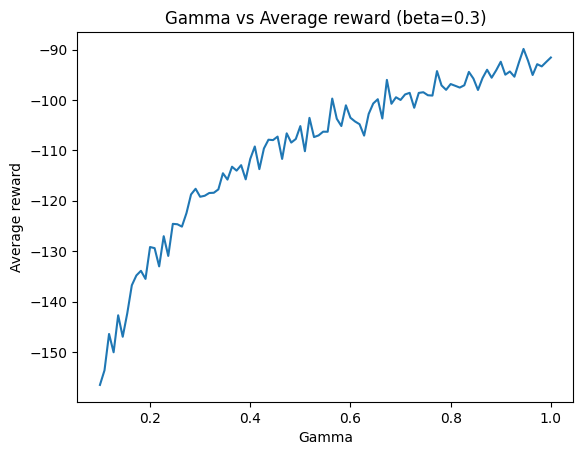

In [153]:
gammas = np.linspace(0.1, 1, 100)
average_rewards = []

for gamma in gammas:
    average_rewards_for_gamma = []
    for _ in range(15):
        _, rewards = q_learn(env=env, episodes_count=100, epsilon=0.1, gamma=gamma, beta=0.3)
        average_rewards_for_gamma.append(np.average(rewards))
    average_rewards.append(np.average(average_rewards_for_gamma))
    
draw_plot(gammas, average_rewards, 'Gamma', 'Average reward', 'Gamma vs Average reward (beta=0.3)')

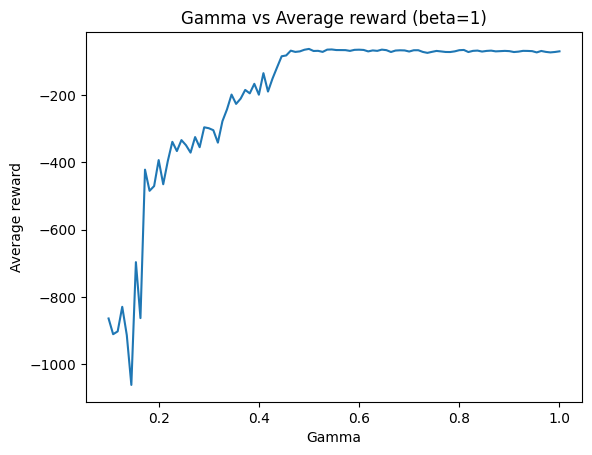

In [152]:
gammas = np.linspace(0.1, 1, 100)
average_rewards = []

for gamma in gammas:
    average_rewards_for_gamma = []
    for _ in range(15):
        _, rewards = q_learn(env=env, episodes_count=100, epsilon=0.1, gamma=gamma, beta=1.2)
        average_rewards_for_gamma.append(np.average(rewards))
    average_rewards.append(np.average(average_rewards_for_gamma))
    
draw_plot(gammas, average_rewards, 'Gamma', 'Average reward', 'Gamma vs Average reward (beta=1.2)')

Z tego co mi wiadomo, parametr gamma wybierany jest z przedziału (0, 1), dlatego też badania zostały przeprowadzone dla takiego zakresu

Dla niskiej wartości parametru beta (0.3), skuteczność algorytmu rośnie wraz ze wzrosem parametru gamma i osiąga maksimum dla gamma~1.

Dla wyższej i optymalniejszej (co wnioskuje po jej badaniach) wartości beta (1.2), wzrost gammy również powoduje wzrost skuteczności algorytmu, z tym że maksimum osiągane jest dużo wcześniej, bo dla gamma~0.5

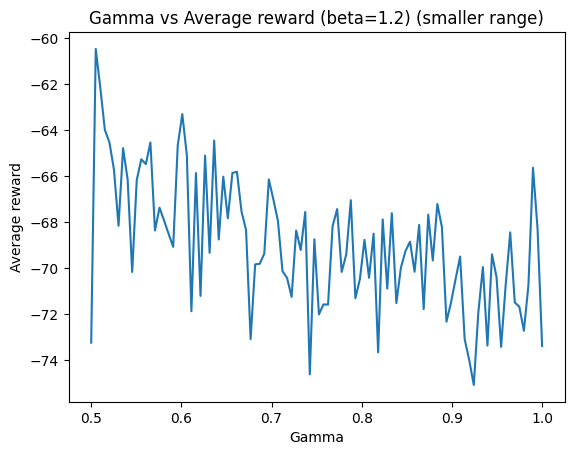

In [155]:
gammas = np.linspace(0.5, 1, 100)
average_rewards = []

for gamma in gammas:
    average_rewards_for_gamma = []
    for _ in range(15):
        _, rewards = q_learn(env=env, episodes_count=100, epsilon=0.1, gamma=gamma, beta=1.2)
        average_rewards_for_gamma.append(np.average(rewards))
    average_rewards.append(np.average(average_rewards_for_gamma))
    
draw_plot(gammas, average_rewards, 'Gamma', 'Average reward', 'Gamma vs Average reward (beta=1.2) (smaller range)')

Dodatkowo, dla beta=1.2 i gamma z przedziału (0.5, 1) średnie wartości nagród są wyższe niż w przypadku beta=0.3